In [0]:
import pandas as pd
import numpy as np

In [0]:
df_inflation = pd.read_csv('IFS_03-14-2020 16-11-47-72_timeSeries.csv')

In [12]:
df_inflation.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
0,"China, P.R.: Mainland",924,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,1.320806,1.301178,-1.388877,-0.58898,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.59999,0.200005,-0.500006,-1.199986,-0.500009,0.09999,0.90001,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.29999,-0.300002,-0.900003,-0.700002,0.299996,1.0,0.200001,-0.100007,...,1.072125,-0.192864,-0.289855,0.0,0.096899,-0.193611,-0.096993,0.485437,0.57971,0.096061,0.0,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.0,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.0,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.0,1.438849,NaN,NaN,NaN


In [0]:
df_inflation.drop(columns=['Base Year', 'Unnamed: 248'], inplace=True)

## Feature engineering

In [0]:
df_inflation.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)

#### Shape of inflation, current US gdp, Constant gdp

#### Remove columns prior to 1999

#### Remove rows with no values

In [0]:
df_inflation.set_index('Country Name', inplace=True)

#### Imputing Inflation missing values

In [16]:
bool_nan_values = np.isnan(df_inflation.values)
indices_of_nan_values_inflation = np.argwhere(bool_nan_values == True)
indices_of_nan_values_inflation

array([[  0, 241],
       [  1, 241],
       [  2,   0],
       ...,
       [178, 239],
       [178, 240],
       [178, 241]])

In [17]:
imputed_values_inflation = np.load('brits_i_data_inflation.npy')
imputed_values_inflation

array([[[-3.04376870e-01],
        [-2.17708975e-01],
        [ 1.58898644e-02],
        ...,
        [-2.39741616e-03],
        [-5.91961145e-01],
        [-1.12172149e-01]],

       [[ 3.73853222e-02],
        [ 1.00692827e-02],
        [-2.08433364e-02],
        ...,
        [ 4.97962087e-02],
        [ 6.65249676e-02],
        [ 9.11914110e-02]],

       [[ 1.02912998e+00],
        [ 7.65874207e-01],
        [ 1.33488905e+00],
        ...,
        [-2.08545893e-01],
        [ 1.26261115e-01],
        [ 3.52789722e-02]],

       ...,

       [[-1.55994575e-03],
        [ 3.42885405e-03],
        [-6.79206848e-03],
        ...,
        [-1.49915472e-01],
        [-1.24986544e-01],
        [-9.39147323e-02]],

       [[ 8.64175707e-03],
        [ 6.97245449e-03],
        [ 1.32757053e-03],
        ...,
        [-1.12314187e-01],
        [-8.54979530e-02],
        [-5.39881960e-02]],

       [[ 2.21659482e-01],
        [ 4.83236074e-01],
        [ 6.57515466e-01],
        ...,
        

In [0]:
inflation_mean, inflation_std = df_inflation.stack().mean(), df_inflation.stack().std()

In [0]:
new_df_inflation = df_inflation.copy()
for i in range(len(indices_of_nan_values_inflation)):
  ind = tuple(indices_of_nan_values_inflation[i])
  new_df_inflation.iat[ind] = imputed_values_inflation[ind][0]*inflation_std + inflation_mean

In [20]:
new_df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099,0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530

In [21]:
df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
"Tajikistan, Rep. of",NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0

#### Take the last two years as Test Set, others as Train Set

In [0]:
new_df_inflation.head()
col_list = new_df_inflation.columns

train_columns = col_list[:-24] #col_list[:int(0.8*(len(col_list)))]
test_columns = col_list[len(col_list) - 24:]  #col_list[int(0.8*(len(col_list))):]

test_data_inflation = new_df_inflation[[c for c in new_df_inflation.columns if c in test_columns]]
train_data_inflation = new_df_inflation[[c for c in new_df_inflation.columns if c in train_columns]]

In [23]:
train_data_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.303337,0.405680,0.303030,1.208459,-0.597015,-0.200200,-0.200602,0.000000,0.402010,0.500501,0.099602,-0.398010,0.000000,0.499500,0.497018,1.582591,-0.486855,-0.195695,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.618413,0.623269,2.360000,1.651036,0.826526,0.896006,0.651866,0.722733,0.214332,0.223173,1.326777,0.833257,0.481293,1.201988,1.860000,2.905949,0.829994,0.709622,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.700000,0.500000,0.600000,0.110000,0.800000,0.690000,0.310000,0.077581,0.100000,0.500000,0.400000,0.457796,0.600000,0.400000,1.400000,0.494753,0.200000,0.414642,0.200000,0.300000,0.600000,0.800000,0.400000,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,0.094046,0.532286,0.179856,3.992646,0.923362,-0.211996,-0.573771,-1.140382,-0.727607,-0.112804,0.299207,0.137869,0.389447,4.353287,5.799241,0.444696,0.411886,0.189708,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.85

In [24]:
test_data_inflation.head()

,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-2.096000e-01,0.309700,0.493000,-0.092200,0.181600,0.280100,0.315300,0.585100,0.962600,1.399000,1.232800,-0.167000


In [0]:
# new_df_current_us_gdp, new_df_constant_gdp

import calendar
res_lst = []
new_set = set()

for ind, ls in train_data_inflation.iterrows():
  for i in range(len(ls)-12):
    values = ls[i:i+13].values.tolist()
    month_col = ls[i+12:i+13].index[0]
    str_month = calendar.month_name[int(month_col[month_col.find('M') + 1:])]
    year = month_col[:month_col.find('M')]
    values.append(str_month)
    res_lst.append(values)
    # if ind in new_df_current_us_gdp.index:
    #   values.append(str_month)
    #   # values.append(new_df_current_us_gdp.at[ind, str(int(year) - 1)])
    #   # values.append(new_df_constant_gdp.at[ind, str(int(year) - 1)])
    #   res_lst.append(values)
    # elif ',' in ind and ind.split(',')[0].strip() in new_df_current_us_gdp.index:
    #   test = ind.split(',')[0].strip()
    #   # res = [i for i in new_df_current_us_gdp.index if test in i][0]
    #   values.append(str_month)
    #   # values.append(new_df_current_us_gdp.at[res, str(int(year) - 1)])
    #   # values.append(new_df_constant_gdp.at[res, str(int(year) - 1)])
    #   res_lst.append(values)
    #   # print('ind is:', ind.split(',')[0]).strip()
    # else:
    #   #print(ind.split(',')[0].strip())
    #   new_set.add(ind)
      # print('else ind is:', ind)
      
    # values.append(str_month)
    # res_lst.append(values)

#print(new_set)

In [0]:
df_ = pd.DataFrame(res_lst, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'target', 'month'])

In [27]:
df_[df_.isnull().sum(axis=1) > 0].shape

(0, 14)

In [28]:
df_.shape

(36874, 14)

In [29]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,January
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,February
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,March
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,April
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,May


In [0]:
res_df = df_.copy()

## Light GBM Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [32]:
res_df['month'] = res_df['month'].astype('category')
encoder = LabelEncoder()
res_df['month'] = encoder.fit_transform(res_df['month'])
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target,month
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,4
1,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,3
2,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,7
3,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,0
4,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,8


In [0]:
X = res_df.drop(columns=['target'])
y = res_df.loc[:, 'target']

In [0]:
for c in X.columns:
    col_type = X[c].dtype
    if c == 'month':
      X[c] = X[c].astype('category')

In [0]:
# X_train = X[:int(0.8*(len(X)))]
# y_train = y[:int(0.8*(len(y)))]
# X_test = X[int(0.8*(len(X))):]
# y_test = y[int(0.8*(len(y))):]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_test.iloc[0]

0          0.357412
1        0.00937207
2          0.665355
3         0.0930925
4           1.43229
5           0.49514
6          -1.61496
7         -0.686265
8         -0.196097
9           0.90756
10        -0.537784
11        -0.857649
month             3
Name: 22199, dtype: object

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import lightgbm as lgb
dtrain = lgb.Dataset(data=X_train, label=y_train, categorical_feature=['month'])


# def lgb_r2_score(preds, dtrain):
#     labels = dtrain.get_label()
#     return 'r2', r2_score(labels, preds), True


def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        global dtrain    
        params = {'application':'regression','num_iterations': 5000,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l2'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=42, categorical_feature=['month'], stratified=False, verbose_eval =None, metrics=['l2'])
        #cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
       #                       verbose_eval =None, feval=lgb_r2_score) 
        #print('cv-result is:', cv_result.keys())     
        return -np.min(cv_result['l2-mean'])

# Domain space-- Range of hyperparameters
pds = {'num_leaves': (20, 90),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
      
# Optimize
optimizer.maximize(init_points=5, n_iter=35)

optimizer.max['params']

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        | -1.585    |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  57.69    |
|  2        | -1.595    |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  76.26    |
|  3        | -1.654    |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.65    |
|  4        | -1.655    |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  58.39    |
|  5        | -1.601    |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.74    |
|  6        | -1.586    |  0.8      |  0.9      |  13.0     |  30.0     |  0.1      |  20.0     |
|  7        | -1.582    |  0.9158   |  0.64     |  12.81    |  30.01    |  0.06244  |  56.91    |
|  8        | -1.574    |  0.8      |  0.9      |  9.0      |  50.0     |  0.1      |  90.0     |
|  9        | -1.574

{'bagging_fraction': 0.8,
 'feature_fraction': 0.9,
 'max_depth': 13.0,
 'min_child_weight': 41.12605160568585,
 'min_split_gain': 0.1,
 'num_leaves': 90.0}

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lgb_train = lgb.Dataset(data=X_train, label=y_train, categorical_feature=['month'])
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=['month'])

# specify your configurations as a dict
params = {'bagging_fraction': 0.8,
 'feature_fraction': 0.9,
 'max_depth': 13,
 'min_child_weight': 41.12605160568585,
 'min_split_gain': 0.1,
 'num_leaves': 90}


print('Starting training...')
# train
gbm = lgb.train(params, lgb_train)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict

print('x test shape is:')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Starting training...
Saving model...
Starting predicting...
x test shape is:
MAE: 0.5711385015040735
MSE: 1.5272228586208898
RMSE: 1.2358085849438374


### CatBoost model

In [40]:
!pip3 install catboost

import catboost as cgb
dtrain = lgb.Dataset(X_train, y_train, categorical_feature=['month'])

def cat_hyp(depth, bagging_temperature): # Function to optimize depth and bagging temperature
  params = {"iterations": 100,
            "learning_rate": 0.05,
            "eval_metric": "RMSE"
            } # Default Parameters
  params[ "depth"] = int(round(depth)) 
  params["bagging_temperature"] = bagging_temperature
  
  cv_dataset = cgb.Pool(data=X,
                  label=y,
                  cat_features=['month'])

  scores = cgb.cv(cv_dataset,
              params,
              fold_count=3)
  # print('scores are:', scores)
  return -np.min(scores['test-RMSE-mean'])  # Return maximum R-Squared value   

# Domain space-- Range of hyperparameters
# Search space
pds = {'depth': (3, 12), 'bagging_temperature': (3,10)}

#!pip3 install bayesian-optimization

from bayes_opt import BayesianOptimization
# Surrogate model
optimizer = BayesianOptimization(cat_hyp, pds, random_state=7)

# Optimize
optimizer.maximize(init_points=5, n_iter=10)

optimizer.max['params']

     |████████████████████████████████| 64.8MB 56kB/s 
|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
0:	learn: 1.4620124	test: 1.4684199	best: 1.4684199 (0)	total: 287ms	remaining: 28.4s
1:	learn: 1.4407398	test: 1.4550944	best: 1.4550944 (1)	total: 495ms	remaining: 24.3s
2:	learn: 1.4211153	test: 1.4431372	best: 1.4431372 (2)	total: 705ms	remaining: 22.8s
3:	learn: 1.4020490	test: 1.4314406	best: 1.4314406 (3)	total: 914ms	remaining: 21.9s
4:	learn: 1.3838532	test: 1.4203065	best: 1.4203065 (4)	total: 1.13s	remaining: 21.5s
5:	learn: 1.3671598	test: 1.4108975	best: 1.4108975 (5)	total: 1.34s	remaining: 21s
6:	learn: 1.3506353	test: 1.4018438	best: 1.4018438 (6)	total: 1.55s	remaining: 20.6s
7:	learn: 1.3353002	test: 1.3943504	best: 1.3943504 (7)	total: 1.76s	remaining: 20.2s
8:	learn: 1.3206290	test: 1.3870321	best: 1.3870321 (8)	total: 1.97s	remaining: 19.9s
9:	learn: 1.3068713	test: 1.3804267	best: 1.3804267 (9)	total: 2.19s	rema

{'bagging_temperature': 6.507843245619565, 'depth': 3.648460200237854}

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

cb_model = cgb.CatBoostRegressor(iterations = 100, learning_rate = 0.05, depth=3, bagging_temperature = 6.507843245619565)

cb_model.fit(X_train, y_train, cat_features=['month'])

y_pred = cb_model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

0:	learn: 1.4184302	total: 10.5ms	remaining: 1.03s
1:	learn: 1.4074862	total: 18.2ms	remaining: 891ms
2:	learn: 1.3968250	total: 25.7ms	remaining: 831ms
3:	learn: 1.3865708	total: 34.5ms	remaining: 828ms
4:	learn: 1.3779603	total: 41.5ms	remaining: 788ms
5:	learn: 1.3703646	total: 48.6ms	remaining: 762ms
6:	learn: 1.3613743	total: 55ms	remaining: 730ms
7:	learn: 1.3540877	total: 61.3ms	remaining: 705ms
8:	learn: 1.3471721	total: 67.6ms	remaining: 684ms
9:	learn: 1.3411788	total: 74.7ms	remaining: 672ms
10:	learn: 1.3348533	total: 83.5ms	remaining: 675ms
11:	learn: 1.3283951	total: 89.9ms	remaining: 660ms
12:	learn: 1.3204694	total: 96.5ms	remaining: 646ms
13:	learn: 1.3135595	total: 103ms	remaining: 631ms
14:	learn: 1.3087411	total: 109ms	remaining: 620ms
15:	learn: 1.3038953	total: 116ms	remaining: 608ms
16:	learn: 1.2996811	total: 122ms	remaining: 598ms
17:	learn: 1.2961070	total: 129ms	remaining: 588ms
18:	learn: 1.2920967	total: 136ms	remaining: 579ms
19:	learn: 1.2861587	total: 14

#### XGBoost Model

In [42]:
# encoder = LabelEncoder()
X_train['month'] = encoder.fit_transform(X_train['month'])
X_train.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'month'], dtype=object)

In [43]:
X_train['month']

32328     4
8277      3
28641     1
16675     0
17989     1
         ..
16850    11
6265      3
11284     8
860       4
15795     1
Name: month, Length: 29499, dtype: int64

In [45]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Define Objective Function
def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma ):
    params = {
    'n_estimators': 300,
    'eta': 0.05,
    'objective': 'reg:linear',
    'eval_metric':'rmse', # Optional --> Use eval_metric if you want to stop evaluation based on eval_metric 
    'silent': 1
     }
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    scores = xgb.cv(params, dtrain, num_boost_round=1000, verbose_eval=False, early_stopping_rounds=10, maximize=True, nfold=5)
    return  scores['test-rmse-mean'].iloc[-1]


pds = {
  'min_child_weight':(14, 20),
  'gamma':(0, 5),
  'subsample':(0.5, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (5, 10)
}

# Surrogate model
optimizer = BayesianOptimization(hyp_xgb, pds, random_state=10)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        |  1.408    |  0.7942   |  0.1038   |  8.168    |  18.49    |  0.7493   |
|  2        |  1.412    |  0.3023   |  0.9903   |  8.803    |  15.01    |  0.5442   |
|  3        |  1.407    |  0.7168   |  4.767    |  5.02     |  17.07    |  0.9063   |
|  4        |  1.408    |  0.6513   |  3.609    |  6.459    |  19.51    |  0.8573   |
|  5        |  1.408    |  0.5883   |  0.7109   |  6.867    |  18.04    |  0.7209   |
|  6        |  1.412    |  0.2089   |  4.832    |  9.801    |  14.02    |  0.6684   |
|  7        |  1.405    |  0.7909   |  0.1292   |  9.96     |  14.07    |  0.9505   |
|  8        |  1.415    |  0.1169   |  4.946    |  9.633    |  19.91    |  0.6221   |
|  9        |  1.415    |  0.1013   |  0.1841   |  5.035    |  19.93    |  0.6309   |
|  10       |  1.415    |  0.1256   |  4.596    |  5.3

In [46]:
optimizer.max['params']

{'colsample_bytree': 0.1255832998331979,
 'gamma': 4.596159775179568,
 'max_depth': 5.318840839952264,
 'min_child_weight': 15.836064534270728,
 'subsample': 0.5018517762406259}

In [0]:
X_test['month'] = encoder.fit_transform(X_test['month'])

In [48]:
xgb_model = xgb.XGBRFRegressor(params=optimizer.max['params'])

xgb_model.fit(X_train.values, y_train.values)

# predict
y_pred = xgb_model.predict(X_test.values)
# eval
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[14:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.6115176289101828
MSE: 1.6478690473820778
RMSE: 1.2836935176988618


### ARIMA model

In [49]:
train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Armenia')]

test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Armenia')]
train_df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Armenia, Rep. of",1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,1.322465,3.025364,2.461525,-0.054104,-0.072663,-0.430662,-0.480486,-1.413583,-2.151702,0.08607,0.130956,-0.410584,0.622431,1.665628,2.189354,-1.400459,-0.333295,-0.320258,-0.668891,-0.463351,-2.343199,-0.471596,0.143413,0.541575,0.972613,1.149876,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751


In [50]:
train_df_armenia.values[0]

array([ 1.8821474 ,  0.12066787, -0.39356959, -0.81264317, -0.31616196,
       -0.29402207, -1.97041502, -1.28604046,  0.25849622, -0.0136536 ,
        0.88324241,  2.40968449,  4.62423258, -0.93677745,  0.01601118,
       -0.09094838,  1.61492926, -1.33360479, -2.70576257, -0.68812822,
       -1.17422456,  0.08610333,  1.2068523 ,  2.42032886,  2.21925929,
       -0.72534829, -0.61741276,  2.53010806,  1.69502479, -0.51748794,
       -4.95270685, -3.03201313, -0.63587753,  0.5101827 ,  2.22930894,
        3.58245393,  4.13224811, -1.54026503, -0.45123011,  2.04698441,
        1.17771127,  1.37918353, -5.50235822, -2.30799601,  2.51597769,
       -0.09152247,  2.23047632,  5.16252747,  2.51600074, -0.57546416,
        0.28075095,  1.24643618,  1.13461889, -0.14866627, -2.50080337,
       -2.3742206 , -0.7379586 ,  0.11886571,  0.83143394,  2.33264624,
        5.4145978 , -0.66545225, -0.94197828, -0.9004052 ,  0.09939597,
       -1.41732516, -4.50592424, -1.380965  ,  0.93268941,  0.09

In [51]:
!pip3 install pyramid-arima

from pyramid.arima import auto_arima
arima_model = auto_arima(train_df_armenia.values[0], trace=True, error_action='ignore', suppress_warnings=True)
arima_model.fit(train_df_armenia.values[0])

arima_model_predicted = arima_model.predict(n_periods=len(test_df_armenia.values[0]))

rms = sqrt(mean_squared_error(test_df_armenia.values[0], arima_model_predicted))
print('RMSE:', rms)
mse = mean_squared_error(test_df_armenia.values[0], arima_model_predicted)
print('MSE:', mse)
mae = mean_absolute_error(test_df_armenia.values[0], arima_model_predicted)
print('MAE:', mae)


#forecast = pd.DataFrame(forecast,index = test_df_armenia.values[0],columns=['Prediction'])

#plot the predictions for validation set

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# plt.plot(train_df_armenia.values[0], label='Train')
# plt.plot(test_df_armenia.values[0], label='Test')
# plt.plot(forecast, label='Prediction')
# plt.xlabel('Index')
# plt.ylabel('Inflation')
# plt.title('ARIMA model for inflation of Armenia')
# plt.legend()
# plt.show()

     |████████████████████████████████| 604kB 8.3MB/s 
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=779.928, BIC=800.235, Fit time=0.447 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=841.750, BIC=848.519, Fit time=0.013 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=804.015, BIC=814.169, Fit time=0.036 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=793.804, BIC=803.957, Fit time=0.042 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=797.695, BIC=814.617, Fit time=0.196 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=778.784, BIC=802.475, Fit time=0.306 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=797.028, BIC=817.335, Fit time=0.316 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=736.920, BIC=763.996, Fit time=0.817 seconds
Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=743.346, BIC=777.191, Fit time=0.936 seconds


### Random Walk

#### Fast AI model (neural nets)

In [52]:
!pip3 install fastai

In [0]:
from fastai.tabular import *

In [0]:
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test
# train_data = res_df[:int(0.8*(len(res_df)))]
# test_data = res_df[int(0.8*(len(res_df))):]

In [0]:
path = ''

#The dependent variable/target
dep_var = 'target'

#The list of categorical features in the dataset
cat_names = ['month'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

#List of Processes/transforms to be applied to the dataset
procs = [Categorify, Normalize]

#Start index for creating a validation set from train_data
start_indx = len(train_data) - int(len(train_data) * 0.2)

#End index for creating a validation set from train_data
end_indx = len(train_data)

#TabularList for Validation
val = (TabularList.from_df(train_data.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))

test = (TabularList.from_df(test_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))

#TabularList for training
data = (TabularList.from_df(train_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [56]:
data.show_batch(rows = 10)

month,0,1,2,3,4,5,6,7,8,9,10,11,target
7,0.2976,-0.6046,0.2671,0.3246,-0.2736,-0.2415,-0.2718,0.1883,-0.7445,-0.7016,-0.4047,-0.3824,-0.11529327
4,1.0005,0.7481,0.4420,0.5720,0.9042,0.5187,0.1336,-0.8326,-1.3913,-0.8534,0.0050,0.5025,2.207862
1,-0.1725,-0.1715,-0.1155,0.0293,0.1737,0.0906,0.9038,0.4017,0.1068,0.1037,-0.1089,-0.2472,0.4
1,-0.1901,-0.5682,-0.0154,0.2024,0.7985,0.2656,0.5317,0.4924,0.3928,0.2154,0.3976,0.2569,0.26533383
11,-0.3339,0.4617,0.5921,1.0027,-0.0873,0.2507,0.3254,0.0172,0.4808,0.8319,1.1825,-0.4582,0.63071895
11,-0.1099,0.1427,-0.0980,-0.1914,-0.7918,-0.2597,0.1805,0.6698,0.0999,-0.1971,-0.8627,-0.0057,0.17865503
4,-0.6710,0.0332,-0.2641,0.1468,-0.1931,0.1341,0.2759,-1.4053,-0.8469,-0.1330,-0.0832,1.3389,1.8821604
4,-0.4618,-0.3040,0.6643,-0.7146,-0.8675,-0.4176,-0.9899,-0.4014,0.1217,0.2558,-0.1772,0.1138,-0.4048583
4,-0.0211,-0.0122,0.2012,-0.1040,-0.3894,-0.3810,-0.4416,0.0789,-0.0016,-0.3318,-0.6597,-0.5081,0.2957304
4,0.4786,-0.0943,0.0708,-0.0596,-0.3210,0.1217,-0.1988,-0.5995,-0.2735,-0.2152,-0.4633,-0.1267,1.1927595


In [0]:
#Initializing the network
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics= [rmse, mse, mae])

In [58]:
#Show the complete Summary of the model
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (23600 items)
x: TabularList
month 4; 0 1.0824; 1 -1.2318; 2 -0.5519; 3 -0.5230; 4 -0.7694; 5 -0.5811; 6 -2.0162; 7 -0.6694; 8 -0.2152; 9 0.0639; 10 0.3698; 11 0.4945; ,month 3; 0 -0.6106; 1 -0.8967; 2 -0.3914; 3 0.1658; 4 0.3784; 5 -0.0390; 6 -0.1109; 7 -0.6116; 8 0.1001; 9 0.1616; 10 -0.1149; 11 0.5721; ,month 1; 0 -0.0167; 1 -0.0207; 2 -0.0318; 3 -0.0169; 4 0.0054; 5 0.0199; 6 0.0514; 7 0.0682; 8 0.0701; 9 0.0599; 10 0.0417; 11 0.0203; ,month 0; 0 0.8631; 1 1.5205; 2 0.8579; 3 0.5271; 4 0.3953; 5 0.2252; 6 0.2792; 7 0.2292; 8 0.4512; 9 0.3717; 10 0.7414; 11 0.8967; ,month 1; 0 -0.2986; 1 0.1687; 2 -0.3222; 3 -0.5458; 4 -0.2269; 5 -0.5127; 6 0.3623; 7 -0.0693; 8 0.0144; 9 -0.2258; 10 -0.1565; 11 -0.4821; 
y: FloatList
2.602985,-1.2440192,0.45092905,1.6008618,0.0
Path: .;

Valid: LabelList (5899 items)
x: TabularList
month 9; 0 -0.1371; 1 -0.0501; 2 -0.5853; 3 -0.1354; 4 -0.0452; 5 -0.0479; 6 -0.0500; 7 -0

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


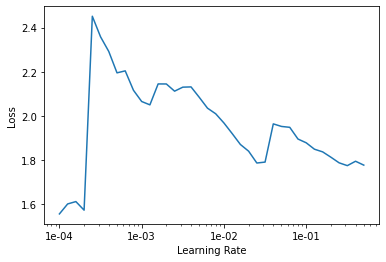

In [59]:
#Exploring the learning rates
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

In [60]:
#Fitting data and training the network
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,root_mean_squared_error,mean_squared_error,mean_absolute_error,time
0,1.191625,2.442618,1.101394,2.442619,0.600396,00:06
1,1.065709,2.335968,1.076432,2.335967,0.576765,00:08
2,1.523299,2.395347,1.116541,2.395347,0.588382,00:08
3,1.425277,2.453991,1.144962,2.453991,0.596493,00:06
4,1.255365,2.331159,1.082499,2.331159,0.585242,00:06
5,1.520770,2.287455,1.075838,2.287455,0.577000,00:06
6,1.212820,2.288849,1.071007,2.288848,0.588893,00:06
7,1.524595,2.341918,1.094731,2.341918,0.592081,00:06
8,1.479184,2.438493,1.109551,2.438493,0.581081,00:06
9,1.766439,2.319328,1.084651,2.319328,0.574597,00:06


In [61]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train, rows = 5)
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

month,0,1,2,3,4,5,6,7,8,9,10,11,target,prediction
2,-0.1502,1.0439,0.2591,0.2046,0.2634,-0.4303,-0.2697,-0.3807,-0.2105,0.0011,-0.2163,-0.4230,0.074571215,[0.247662]
9,0.1344,0.7231,0.2775,1.5244,-0.3085,-0.0932,-1.2369,-0.8663,-0.2663,0.0934,0.7729,0.6607,1.2950504,[0.755595]
7,0.0807,-0.3682,-0.4003,-0.3074,-0.0467,-0.2758,-1.0360,0.3255,-1.0122,-0.3946,0.0364,-0.7785,1.3228315,[0.262105]
1,-0.5417,-0.4321,-0.1887,-0.1771,-0.3085,-0.5933,-0.3940,-0.1848,0.2986,0.2186,0.5597,0.2144,-0.5607477,[0.244988]
0,0.1017,0.3538,-0.1987,-0.5211,0.0465,-0.2193,-0.3239,0.0047,0.4229,0.1894,0.1503,-0.3257,0.44173563,[0.367236]


month,0,1,2,3,4,5,6,7,8,9,10,11,target,prediction
9,-0.1371,-0.0501,-0.5853,-0.1354,-0.0452,-0.0479,-0.0500,-0.3261,-0.2275,-0.1338,-0.1438,-0.2294,0.0,[0.17594]
4,-0.1170,-0.3040,-0.3222,-0.3074,-0.1767,-0.2281,-0.3239,-0.1872,-0.1820,-0.1757,-0.2549,-0.3178,0.37914693,[0.209262]
0,0.0893,-0.4103,-0.9506,0.3985,0.0172,-0.1988,-0.0301,-0.4148,-0.2936,-0.4628,-0.1805,-0.5527,0.5448223,[0.220474]
8,-0.2555,-0.2285,-0.4241,-0.0466,-0.0428,-0.3027,-0.4709,-0.2354,-0.3881,-0.0428,-0.1217,-0.0158,0.42567492,[0.144579]
3,-0.4253,-0.1707,-0.3914,-0.1044,-0.2395,-0.1619,-0.1796,-0.4713,-0.3867,-0.3735,-0.0375,-0.1065,0.3976143,[0.145386]


In [62]:
#Getting The Training And Validation Errors
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))
print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7f87ac8a8048>, <function mean_squared_error at 0x7f87ac8a7f28>, <function mean_absolute_error at 0x7f87ac8a7ea0>]

The calculated RMSE & R-Squared For The Training Set : [tensor(0.9972), tensor(1.6463), tensor(0.5484)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(1.0928), tensor(2.4818), tensor(0.5751)]


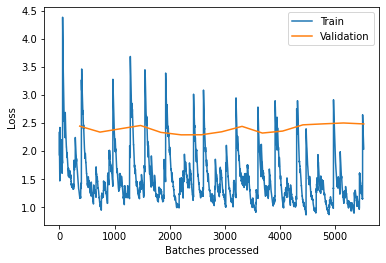

In [63]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()

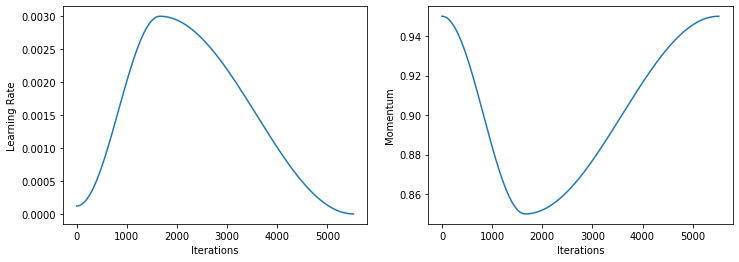

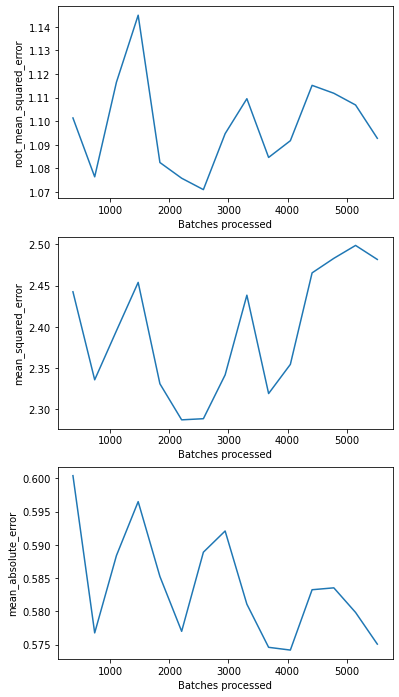

In [64]:
#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()

In [65]:
#Predicting For The Complete Test set
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]
#Converting the prediction to . a dataframe
test_predictions = pd.DataFrame(test_predictions, columns = ['target'])
#Writing the predictions to an excel file.
#predictions.to_excel("Fast_ai_solution.xlsx", index = False)

https://analyticsindiamag.com/a-hands-on-guide-to-regression-with-fast-ai/

https://medium.com/analytics-vidhya/neural-networks-for-tabular-data-touching-the-untouched-efd66c950463

https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai

### Test Model (recursive approach)

In [66]:
test_data_inflation.head()

,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-3.700278e-01,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,0.280121
"Belarus, Rep. of",0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,3.814927e-01,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,0.576504
"Tajikistan, Rep. of",0.150830,0.344490,0.417331,0.465022,0.522238,0.741840,0.441826,0.439883,0.218978,0.218500,0.581395,-0.072254,2.016887e-08,0.650759,0.431034,0.357654,0.285103,0.355366,0.495751,0.634249,0.280112,0.139665,0.627615,0.495017
"Azerbaijan, Rep. of",0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,6.068041e-01,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,0.551973
Vietnam,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-2.096000e-01,0.309700,0.493000,-0.092200,0.181600,0.280100,0.315300,0.585100,0.962600,1.399000,1.232800,-0.167000


In [67]:
train_data_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, P.R.: Mainland",1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.303337,0.405680,0.303030,1.208459,-0.597015,-0.200200,-0.200602,0.000000,0.402010,0.500501,0.099602,-0.398010,0.000000,0.499500,0.497018,1.582591,-0.486855,-0.195695,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000e+00,0.287908,0.669856,1.235741
"Belarus, Rep. of",14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.618413,0.623269,2.360000,1.651036,0.826526,0.896006,0.651866,0.722733,0.214332,0.223173,1.326777,0.833257,0.481293,1.201988,1.860000,2.905949,0.829994,0.709622,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,4.521840e-01,0.172397,0.750000,0.913151
"Tajikistan, Rep. of",1.943463,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.700000,0.500000,0.600000,0.110000,0.800000,0.690000,0.310000,0.077581,0.100000,0.500000,0.400000,0.457796,0.600000,0.400000,1.400000,0.494753,0.200000,0.414642,0.200000,0.300000,0.600000,0.800000,0.400000,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,1.209677,1.354582,0.923447,1.094605,0.581748,2.016887e-08,0.230415,0.613027,0.990099
"Azerbaijan, Rep. of",0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,0.094046,0.532286,0.179856,3.992646,0.923362,-0.211996,-0.573771,-1.140382,-0.727607,-0.112804,0.299207,0.137869,0.389447,4.353287,5.799241,0.444696,0.411886,0.189708,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,1.811233e-01,0.092961,0.014515,0.154629
Vietnam,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.85

#### Take only Armenian values

In [0]:
train_df_armenia = train_data_inflation[train_data_inflation.index.str.contains('Armenia')]
test_df_armenia = test_data_inflation[test_data_inflation.index.str.contains('Armenia')]
#df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)
# current_gdp_armenia = new_df_current_us_gdp[new_df_current_us_gdp.index.str.contains('Armenia')]
# constant_gdp_armenia = new_df_constant_gdp[new_df_constant_gdp.index.str.contains('Armenia')]

### Testing ALL Models

In [0]:
def predict_value(conc, model, ind):
  if model == 'lgb':
    return gbm.predict(np.array(conc).reshape(1, (len(conc))), num_iteration=gbm.best_iteration)
  if model == 'cgb':
    return cb_model.predict(conc)
  if model == 'xgb':
    return xgb_model.predict(conc)
  if model == 'nn':
    conc[12] = calendar.month_name[conc[12]]
    df_test = pd.DataFrame([conc], columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'month'])
    return learn.predict(df_test.iloc[0])[1].numpy()[0]
  if model == 'rf':
    return RForest.predict(np.array(conc).reshape(1, -1))
  if model == 'rf_tuned1':
    return rf_random.best_estimator_.predict(np.array(conc).reshape(1, -1))
  if model == 'rf_tuned2':
    return rf.predict(np.array(conc).reshape(1, -1))

In [0]:
# arima_model = auto_arima(train_df_armenia.values[0], trace=True, error_action='ignore', suppress_warnings=True)
# conc = [-0.30974465034828, 0.980564922169289, -0.24626357103330399, -0.9472450943761, -2.57530630354213, -0.394276974215594, 0.150221295189987, 0.7980931475689241, 1.97809175911834, 1.53758062614707, 2.8444605480274503, -0.47575075634108094]

In [71]:
len(train_df_armenia.values[0]), len(test_df_armenia.values[0])

(218, 24)

In [0]:
# arima_model.fit(train_df_armenia.values[0])

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
def calculate_model_result(model):

  df_errors = {'MSE': {}, 'MAE': {}, 'RMSE': {}}

  len_train_df = len(train_df_armenia.columns)

  df_predicted_values = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6:[]}
  df_test_values = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6:[]}

  for i in range(len(test_df_armenia.columns)-6):
    
    true_values = np.array([])
    predicted_values = np.array([])

    for j in range(7):
      if i + j <= 12:
        if i + j < 12:
          arr1 = train_df_armenia[train_df_armenia.columns[-(12-i-j):]].values[0]
        else:
          arr1 = np.array([])
        arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr1, arr2, arr3), axis=0)
      else:
        arr2 = test_df_armenia[test_df_armenia.columns[i - (12 - j):i]].values[0]
        if j > 0:
          arr3 = predicted_values[-j:]
        else:
          arr3 = np.array([])

        conc = np.concatenate((arr2, arr3), axis=0)

      month_col = test_df_armenia.columns[i+j]
      str_month = int(month_col[month_col.find('M') + 1:]) # calendar.month_name[]
      year = month_col[:month_col.find('M')]
      l = [str_month]
      conc = conc.tolist() + l
      y_pred = predict_value(conc, model, i+j)  #gbm.predict(np.array(conc).reshape(1, (len(conc))), num_iteration=gbm.best_iteration) #xgb_model.predict(conc) #cb_model.predict(conc)
      # print('pred', y_pred)
      # true_values = np.append(true_values, test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      # predicted_values = np.append(predicted_values, y_pred)
      df_predicted_values[j].append(y_pred)
      df_test_values[j].append(test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      # true_values = np.append(true_values, test_df_armenia[test_df_armenia.columns[i+j]].values[0])
      predicted_values = np.append(predicted_values, y_pred)

  for key in df_predicted_values.keys():
    df_errors['MSE'][key] = mean_squared_error(df_test_values[key], df_predicted_values[key])
    df_errors['MAE'][key] = mean_absolute_error(df_test_values[key], df_predicted_values[key])
    df_errors['RMSE'][key] = np.sqrt(mean_squared_error(df_test_values[key], df_predicted_values[key]))

  return df_errors

In [0]:
def calculate_arima():

  df_errors = {'MSE': {}, 'MAE': {}, 'RMSE': {}}
  len_train_df = len(train_df_armenia.columns)

  df_predicted_values = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
  df_test_values = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}

  for i in range(len(test_df_armenia.columns)-6):
    arr1 = train_df_armenia[train_df_armenia.columns[-(len_train_df-i):]].values[0]
    arr2 = test_df_armenia[test_df_armenia.columns[:i]].values[0]

    conc = np.concatenate((arr1, arr2), axis=0)
    arima_model.fit(conc)
    y_pred = arima_model.predict(n_periods=6)

    for key in range(1, 7):
      df_predicted_values[key].append(y_pred[key - 1])
      df_test_values[key].append(test_df_armenia.values[0][i + key])

  for key in df_predicted_values.keys():
    df_errors['MSE'][key] = mean_squared_error(df_test_values[key], df_predicted_values[key])
    df_errors['MAE'][key] = mean_absolute_error(df_test_values[key], df_predicted_values[key])
    df_errors['RMSE'][key] = np.sqrt(mean_squared_error(df_test_values[key], df_predicted_values[key]))

  return df_errors

In [0]:
df_errors = calculate_arima()

In [78]:
df_errors['MSE']

{1: 0.49491533882236943,
 2: 0.4393457751352135,
 3: 0.4278164206233692,
 4: 0.3287224887464977,
 5: 0.3160857763874885,
 6: 0.3772215294866194}

In [79]:
df_errors['RMSE']

{1: 0.7035021953216418,
 2: 0.6628316340785294,
 3: 0.6540767696710909,
 4: 0.5733432556039163,
 5: 0.5622150623982681,
 6: 0.6141836284749207}

In [80]:
df_errors['MAE']

{1: 0.5422308290940901,
 2: 0.5291786813714068,
 3: 0.5299582979572443,
 4: 0.4663242926660577,
 5: 0.43927556333615364,
 6: 0.4483855164961261}

In [0]:
# from statistics import mean
# print('model', 'ARIMA', mean(df_errors['MSE']), mean(df_errors['RMSE']), mean(df_errors['MAE']))

In [82]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
print('MAE:', mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.565465027512838
MSE: 1.5516691613440976
RMSE: 1.2456601307516018


#### Hyperparameter tuning for Random Forest

Test #1

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 21, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 11, 12, 13, 14, 16, 17, 18, 19, 21, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 222, 244, 266, 288, 311, 333, 355, 377, 400]}


In [85]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 7, cv = 5, verbose=2, random_state=42)
# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  37.5s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.5s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  37.5s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  36.9s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  37.0s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=17, bootstrap=False, total=  36.9s
[CV] n_estimators=355, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=3

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 46.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [86]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 244,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [87]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())
predictions = rf_random.best_estimator_.predict(X_test)
# print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 244,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
MSE: 1.4750837294427477


Test #2

In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 30)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 41, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10,
               11,
               13,
               14,
               16,
               18,
               19,
               21,
               23,
               24,
               26,
               27,
               29,
               31,
               32,
               34,
               36,
               37,
               39,
               41,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [200,
                  220,
                  241,
                  262,
                  282,
                  303,
                  324,
                  344,
                  365,
                  386,
                  406,
                  427,
                  448,
                  468,
                  489,
                  510,
                  531,
                  551,
                  572,
                  593,
 

In [89]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 7, cv = 5, verbose=2, random_state=42)
# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3)
# Fit the random search model
rf_random_2.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True, total= 3.1min
[CV] n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True, total= 3.1min
[CV] n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True 
[CV]  n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True, total= 3.0min
[CV] n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True 
[CV]  n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True, total= 3.1min
[CV] n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True 
[CV]  n_estimators=510, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=36, bootstrap=True, total= 3.0min
[CV] n_estimators=613, min_samples_split=2, min_samples_leaf=8, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=613, min_s

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 54.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [90]:
from pprint import pprint
pprint(rf_random_2.best_estimator_.get_params())
predictions = rf_random_2.best_estimator_.predict(X_test)
# print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 37,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 613,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
MSE: 1.502503435562893


In [102]:
rf = RandomForestRegressor()
rf.set_params(bootstrap = True, ccp_alpha = 0.0, criterion = 'mse', max_depth = 37,
 max_features = 'sqrt', max_leaf_nodes = None, max_samples = None, min_impurity_decrease = 0.0,
 min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 5, min_weight_fraction_leaf = 0.0,
 n_estimators = 613, n_jobs = None, oob_score = False, random_state = 42, verbose = 0, warm_start = False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=37, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=613, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [103]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=37, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=613, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [104]:
predictions = rf.predict(X_test)
print('MSE:', mean_squared_error(y_test, predictions))

MSE: 1.4856794710299253


In [0]:
from statistics import mean

model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf', 'rf_tuned1', 'rf_tuned2']
res_ = {}
for model in model_list:
  df_errors = calculate_model_result(model)
  res_[model] = df_errors

In [115]:
model_list = ['lgb', 'cgb', 'xgb', 'nn', 'rf', 'rf_tuned1', 'rf_tuned2']
for model in model_list:
  for k in range(1, 7):
    print(k, model, res_[model]['MSE'][k], res_[model]['RMSE'][k], res_[model]['MAE'][k])

1 lgb 0.6258532680792247 0.7911088850968776 0.6250813255923363
2 lgb 0.6460562982296257 0.8037762737414098 0.644908496159404
3 lgb 0.5984018272933782 0.7735643653202868 0.5935023923282892
4 lgb 0.4984250677822116 0.7059922575936733 0.5262760378012001
5 lgb 0.5168120302334999 0.7188963974269866 0.5309830011287137
6 lgb 0.5545886416476282 0.7447070844618227 0.5651199448007345
1 cgb 0.7693385131328478 0.8771194406310054 0.6911902534920727
2 cgb 0.7427648110947972 0.8618380422647849 0.65799274414485
3 cgb 0.6785415394373513 0.8237363288318363 0.6204249712116146
4 cgb 0.5735189431659317 0.757310334780882 0.5674168362774556
5 cgb 0.5337675982182934 0.7305940036835051 0.5412109195668622
6 cgb 0.5496431649972519 0.741379231565905 0.5534719297741151
1 xgb 1.1000339688337348 1.048825042051216 0.8282377710239159
2 xgb 1.0663520224574126 1.0326432212809091 0.804873059324176
3 xgb 0.9813351321332515 0.9906236077003473 0.7512692732430186
4 xgb 0.8297075584056739 0.9108828455985292 0.6870172093926104